# Pandas

    numpy能够帮助我们处理数值型数据，但常常我们的数据除了数值，还有字符串、时间序列等，这就需要pandas。
    Pandas是一个强大的分析结构化数据的工具集；它的使用基础是Numpy（提供高性能的矩阵运算）；用于数据挖掘和数据分析，同时也提供数据清洗功能。
- Series：一维数组，与Numpy中的一维array类似。二者与Python基本的数据结构List也很相近。Series如今能保存不同种数据类型，字符串、boolean值、数字等都能保存在Series中。
- Time- Series：以时间为索引的Series。
- DataFrame：二维的表格型数据结构。很多功能与R中的data.frame类似。可以将DataFrame理解为Series的容器。
- Panel ：三维的数组，可以理解为DataFrame的容器。
- Panel4D：是像Panel一样的4维数据容器。
- PanelND：拥有factory集合，可以创建像Panel4D一样N维命名容器的模块。

官方网址：https://pandas.pydata.org/pandas-docs/stable/index.html   (有详细的用户使用手册)

## Series

### 创建Series

In [12]:
# 将列表转换为series
import pandas as pd
import numpy as np
a1 = pd.Series([1,2,3,np.nan,44,1],dtype=np.float32)
print(a1)
print(type(a1))

0     1.0
1     2.0
2     3.0
3     NaN
4    44.0
5     1.0
dtype: float32
<class 'pandas.core.series.Series'>


In [21]:
# 将字典转换为Series
temp_dict = {'name':'xiaohong','age':30,'tel':10086}
s3 = pd.Series(temp_dict)
print(s3)

name    xiaohong
age           30
tel        10086
dtype: object


In [3]:
# 如果数据是常量值，则必须提供索引。将重复该值以匹配索引的长度。
import pandas as pd
import numpy as np
res = pd.Series(5,index=[1,2,3,4,5])
print(res)   

1    5
2    5
3    5
4    5
5    5
dtype: int64


In [22]:
# 自定义索引
import string
t = pd.Series(np.arange(10),index=list(string.ascii_uppercase[:10]))
print(t)

A    0
B    1
C    2
D    3
E    4
F    5
G    6
H    7
I    8
J    9
dtype: int32


In [20]:
# 重新自定义索引
a = {string.ascii_uppercase[i]: i for i in range(10)}
b = pd.Series(a)
print(b)
c =pd.Series(a,index = list(string.ascii_uppercase[5:15]))
print(c) # NaN为float类型，所以Series类型自动切换

A    0
B    1
C    2
D    3
E    4
F    5
G    6
H    7
I    8
J    9
dtype: int64
F    5.0
G    6.0
H    7.0
I    8.0
J    9.0
K    NaN
L    NaN
M    NaN
N    NaN
O    NaN
dtype: float64


### 数据查询

In [2]:
# 通过序号查询
import pandas as pd
data = [1,2,3,4,5]
res = pd.Series(data,index=["a","b","c","d","e"])
print(res[0:3],"\n---")  # 这里跟python的切片一样
print(res[3],"\n---")
print(res[-3:],"\n---")
res1 = pd.Series(data)
print(res1,'\n---')
print(res1[[2,4]])

a    1
b    2
c    3
dtype: int64 
---
4 
---
c    3
d    4
e    5
dtype: int64 
---
0    1
1    2
2    3
3    4
4    5
dtype: int64 
---
2    3
4    5
dtype: int64


In [3]:
# 通过index查询
data = [1,2,3,4,5]
res = pd.Series(data,index=["a","b","c","d","e"])
print(res["a"],'\n------')
# 检索多个值 标签用中括号包裹
print(res[["a","b"]]) # 如果用没有的标签检索则会抛出异常KeyError: 'f'

1 
------
a    1
b    2
dtype: int64


In [20]:
# 使用head()/tail()查看前几个或后几个
data = [1,2,3,4,5]
res = pd.Series(data,index=["a","b","c","d","e"])
print('res.head(3):\n',res.head(3),'\n---')  # 查看前三个
print('res.tail(2) :\n',res.tail(2) ,'\n---')# 查看后两个

res.head(3):
 a    1
b    2
c    3
dtype: int64 
---
res.tail(2) :
 d    4
e    5
dtype: int64 
---


In [20]:
# 如果将布尔值作为Serrise的索引，则只保留True对应的元素值
s = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","e"])
print(s)
print(s[[True,True,False,False,True]] )

a    1
b    2
c    3
d    4
e    5
dtype: int64
a    1
b    2
e    5
dtype: int64


### 其他操作(去重、相加、缺省)

In [23]:
# unique() 对series元素进行去重
s = pd.Series(data=[1,1,2,2,3,4,5,6,6,6,7,6,6,7,8])
s.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [9]:
# 多个Series相加
# - 在运算中自动对齐不同索引的数据
#- 如果索引不对应，则补NaN
s1 = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","e"])
print(s1)
s2 = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","f"])
print(s2)
s3 = pd.Series(data=[1,2,3,4,5],index=["a","b","c","d","g"])
s = s1 + s2 +s3
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64
a    1
b    2
c    3
d    4
f    5
dtype: int64
a     3.0
b     6.0
c     9.0
d    12.0
e     NaN
f     NaN
g     NaN
dtype: float64


In [16]:
# 监测缺失的值isnull、notnull
import pandas as pd
import numpy as np
s = pd.Series(data=[1,2,np.nan,4,5],index=["a","b","c","d","e"])
print(s)
print(s.isnull())
print(s.notnull())

a    1.0
b    2.0
c    NaN
d    4.0
e    5.0
dtype: float64
a    False
b    False
c     True
d    False
e    False
dtype: bool
a     True
b     True
c    False
d     True
e     True
dtype: bool


In [25]:
# 取出所有空的数据和所有不为空的数据
s = pd.Series(data=[1,2,np.nan,4,5],index=["a","b","c","d","e"])
print(s[s.isnull()])  # 取出所有nan的元素
print(s[s.notnull()]) # 取出所有不是nan的元素

c   NaN
dtype: float64
a    1.0
b    2.0
d    4.0
e    5.0
dtype: float64


## Time-Series

时间序列（time series）数据是一种重要的结构化数据形式，具体的应用场景，主要有以下几种：

- 时间戳（timestamp），特定的时刻。
- 固定时期（period），如2007年1月或2010年全年。
- 时间间隔（interval），由起始和结束时间戳表示。时期（period）可以被看做间隔（interval）的特例。
- 实验或过程时间，每个时间点都是相对于特定起始时间的一个度量。例如，从放入烤箱时起，每秒钟饼干的直径。

下表显示了pandas可以处理的时间相关类的类型以及如何创建它们：

|Class|Remarks|How to create|
| --- | ---| ---|
|Timestamp|Represents a single timestamp|to_datetime, Timestamp|
|DatetimeIndex|Index of Timestamp|to_datetime, date_range, bdate_range, DatetimeIndex|
|Period|Represents a single time span|Period|
|PeriodIndex|Index of Period|period_range, PeriodIndex|


https://blog.csdn.net/qq_41518277/article/details/80288031


### 时间戳Timestamp()

In [9]:
# 时间戳pd.Timestamp
import pandas as pd
print("pd.Timestamp('2012-05-01'):",pd.Timestamp('2012-05-01'))
print("pd.Timestamp(2012, 5, 1):",pd.Timestamp(2012, 5, 1))

pd.Timestamp('2012-05-01'): 2012-05-01 00:00:00
pd.Timestamp(2012, 5, 1): 2012-05-01 00:00:00


### 格式转换to_datetime()

In [13]:
# to_datetime(arg,errors="raise",dayfirst=False,yearfirst=False,utc=None,box=True,
#     format=None,exact=True,unit=None,infer_datetime_format=False,origin="unix",cache=True,)
import pandas as pd
print(pd.to_datetime(1490195805, unit='s'))
print(pd.to_datetime([1, 2, 5], unit='D', origin=pd.Timestamp('1960-01-01')))

2017-03-22 15:16:45
DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-06'], dtype='datetime64[ns]', freq=None)


In [11]:
import pandas as pd
import numpy as np
dates = ['2017-06-20','2017-06-21','2017-07-22','2017-06-23','2017-08-24','2017-05-25','2017-06-26','2017-06-27']
ts = pd.Series(np.random.randn(8),index = pd.to_datetime(dates))
print(ts)
print(ts['2017-06'])

2017-06-20   -0.141257
2017-06-21   -0.567873
2017-07-22   -1.659507
2017-06-23   -0.470106
2017-08-24    0.243152
2017-05-25   -0.363135
2017-06-26    0.773922
2017-06-27    0.553342
dtype: float64
2017-06-20   -0.141257
2017-06-21   -0.567873
2017-06-23   -0.470106
2017-06-26    0.773922
2017-06-27    0.553342
dtype: float64


### 时间序列data_range()

In [28]:
import pandas as pd
# Signature: pd.date_range(start=None, end=None, periods=None, freq='D',
# tz=None, normalize=False, name=None, closed=None, **kwargs)
"""
    start : str or datetime-like, optional   起始日期
        Left bound for generating dates.
    end : str or datetime-like, optional     截止日期
        Right bound for generating dates.
    periods : integer, optional              区间
        Number of periods to generate.
    在调用构造方法时，必须指定start、end、periods中的两个参数值
"""
print(pd.date_range('20190101',periods=4))
print(pd.date_range(start='2017-01-01', end='2017-01-04'))
print(pd.date_range(end='2017-01-04',periods=4))

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')


In [50]:
"""
    freq : str or DateOffset, default 'D'   计时频率
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.

    pandas支持几十种计时频率，详见https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
"""
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='y'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='m'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='d'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='5d'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='h'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='t'))
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,freq='s'))

DatetimeIndex(['2017-12-31 08:10:50', '2018-12-31 08:10:50'], dtype='datetime64[ns]', freq='A-DEC')
DatetimeIndex(['2017-01-31 08:10:50', '2017-02-28 08:10:50'], dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-02 08:10:50'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-06 08:10:50'], dtype='datetime64[ns]', freq='5D')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 09:10:50'], dtype='datetime64[ns]', freq='H')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 08:11:50'], dtype='datetime64[ns]', freq='T')
DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 08:10:51'], dtype='datetime64[ns]', freq='S')


In [48]:
"""
    tz : str or tzinfo, optional  时区
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
"""
print(pd.date_range(start='2017-01-01 08:10:50',periods=2,tz='Asia/Hong_Kong'))

DatetimeIndex(['2017-01-01 08:10:50+08:00', '2017-01-02 08:10:50+08:00'], dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')


In [23]:
"""
    normalize : bool, default False
        Normalize start/end dates to midnight before generating date range. 生成之前将起始调整至次日0点
"""
print(pd.date_range(start='2017-01-01 08:10:50',periods=10,freq='s',normalize=False))
print('-'*70)
print(pd.date_range(start='2017-01-01 08:10:50',periods=10,freq='s',normalize=True))

DatetimeIndex(['2017-01-01 08:10:50', '2017-01-01 08:10:51',
               '2017-01-01 08:10:52', '2017-01-01 08:10:53',
               '2017-01-01 08:10:54', '2017-01-01 08:10:55',
               '2017-01-01 08:10:56', '2017-01-01 08:10:57',
               '2017-01-01 08:10:58', '2017-01-01 08:10:59'],
              dtype='datetime64[ns]', freq='S')
----------------------------------------------------------------------
DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01',
               '2017-01-01 00:00:02', '2017-01-01 00:00:03',
               '2017-01-01 00:00:04', '2017-01-01 00:00:05',
               '2017-01-01 00:00:06', '2017-01-01 00:00:07',
               '2017-01-01 00:00:08', '2017-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')


In [58]:
"""
name : str, default None
        Name of the resulting DatetimeIndex.
"""
print(pd.date_range(start='2017-01-01', end='2017-01-04',name='我的pd'))

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', name='我的pd', freq='D')


In [57]:
"""
    closed : {None, 'left', 'right'}, optional  开闭区间
        Make the interval closed with respect to the given frequency to
        the 'left', 'right', or both sides (None, the default).
"""
print(pd.date_range(start='2017-01-01', end='2017-01-04',closed='left'))
print(pd.date_range(start='2017-01-01', end='2017-01-04',closed='right'))
print(pd.date_range(start='2017-01-01', end='2017-01-04',closed=None))

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')


In [60]:
# 控制格式，输出list
date_range = pd.date_range(start="2017-01-01 10:00:00", end="2017-01-01 14:00:00", closed="left", freq="1h").format(formatter=lambda x: x.strftime('%Y-%m-%dT%H-%M-%SZ-1min'))
print(date_range) 

['2017-01-01T10-00-00Z-1min', '2017-01-01T11-00-00Z-1min', '2017-01-01T12-00-00Z-1min', '2017-01-01T13-00-00Z-1min']


## DataFrame

DataFrame是一种表格型数据结构，它含有一组有序的列，每列可以是不同的值。DataFrame既有行索引，也有列索引，它可以看作是由Series组成的字典，不过这些Series公用一个索引。

### 创建DataFrame

#### ndarray转化为dataframe

In [62]:
import pandas as pd
import numpy as np

# 不指定行列时，pandas会自动生成序号索引
df1 = pd.DataFrame(np.arange(12).reshape(3,4))
print(df1)

# 行索引index，列索引columns
df2 = pd.DataFrame(np.random.randn(6,4),index= pd.date_range('20190101',periods=6),columns=['a','b','c','d'])
print(df2)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
                   a         b         c         d
2019-01-01  0.942699  0.415446 -0.722186 -0.826837
2019-01-02  0.378579 -0.565907  0.533810 -1.604506
2019-01-03  0.780350  0.583535 -1.137213  1.590289
2019-01-04 -0.313100  0.791528  0.383463  0.181570
2019-01-05 -0.509561  0.519375 -1.900914  0.143416
2019-01-06  1.202654 -0.170630 -0.924289 -0.422686


#### 根据字典创建dataframe

In [12]:
# 可以根据字典来创建DataFrame
data = {
    'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
    'year':[2000,2001,2002,2001,2002],
    'pop':[1.5,1.7,3.6,2.4,2.9]
}
frame = pd.DataFrame(data)
print(frame)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


In [13]:
# 使用嵌套字典也可以创建DataFrame，此时外层字典的键作为列，内层键则作为索引:
pop = {'Nevada':{2001:2.4,2002:2.9},'Ohio':{2000:1.5,2001:1.7,2002:3.6}}
frame3 = pd.DataFrame(pop)
print(frame3)

      Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5


#### 读取文件创建
pandas可以读取csv、excel、hdf、sql、json、msgpack、html、gbq、stata、clipboard、pickle。读取的格式为read_xxx,写的格式为to_xxx
该方法中几个重要的参数如下所示：

|参数|描述|
|---|---|
|header|默认第一行为columns，如果指定header=None，则表明没有索引行，第一行就是数据|
|index_col|默认作为索引的为第一列，可以设为index_col为-1，表明没有索引列|
|nrows|表明读取的行数|
|sep或delimiter|分隔符，read_csv默认是逗号，而read_table默认是制表符\t|
|encoding|编码格式|

In [64]:
import pandas as pd
a = pd.read_csv('JobClass/net/cache/csvtest1.csv')
print(a)

   a  b  c
0  1  2  6


参考：  
1.[Pandas库read_excel()参数详解](https://www.jianshu.com/p/d1eed925509b)  
2.[pandas读取文件的read_csv()](https://www.jianshu.com/p/ebb64a159104)


###  DataFrame属性

In [82]:
df2 = pd.DataFrame({'A':'aaa','B':pd.Categorical([1,2])}) #缺失的会复制
print(df2)
print('-'*10)
print(df2.dtypes)
print('-'*10)
print('df2.shape:\n',df2.shape) # 打印行索引
print('-'*10)
print('df2.index:\n',df2.index) # 打印行索引
print('-'*10)
print('df2.columns:\n',df2.columns)# 打印列索引
print('-'*10)
print('df2.values:\n',df2.values) # 打印值
print('-'*10)
print('df2.info:\n',df2.info)
print('-'*10)
print('df2.size:\n',df2.size)
print('-'*10)
print('len(df2):\n',len(df2))  # 行数

     A  B
0  aaa  1
1  aaa  2
----------
A      object
B    category
dtype: object
----------
df2.shape:
 (2, 2)
----------
df2.index:
 RangeIndex(start=0, stop=2, step=1)
----------
df2.columns:
 Index(['A', 'B'], dtype='object')
----------
df2.values:
 [['aaa' 1]
 ['aaa' 2]]
----------
df2.info:
 <bound method DataFrame.info of      A  B
0  aaa  1
1  aaa  2>
----------
df2.size:
 4
----------
len(df2):
 2


### 常用方法

#### 排序

In [85]:
# 按照索引排序
datas = pd.date_range('20190101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df.sort_index(axis=1,ascending=False))
print(df.sort_index(axis=0,ascending=False))

                   d         c         b         a
2019-01-01 -0.773530 -0.876915  0.256293 -1.819657
2019-01-02 -1.276202  0.116717 -1.313432  1.061195
2019-01-03  0.399502 -0.629984  0.380458 -0.563719
2019-01-04 -1.786003 -0.944398 -0.714544 -0.653221
2019-01-05 -0.499158  0.344810  0.282402  0.295264
2019-01-06  0.015072  0.189184 -1.581833  1.719717
                   a         b         c         d
2019-01-06  1.719717 -1.581833  0.189184  0.015072
2019-01-05  0.295264  0.282402  0.344810 -0.499158
2019-01-04 -0.653221 -0.714544 -0.944398 -1.786003
2019-01-03 -0.563719  0.380458 -0.629984  0.399502
2019-01-02  1.061195 -1.313432  0.116717 -1.276202
2019-01-01 -1.819657  0.256293 -0.876915 -0.773530


In [87]:
# 按照某属性排序
datas = pd.date_range('20190101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df.sort_values(by = 'c'))

                   a         b         c         d
2019-01-06  0.106123  0.105421 -1.369104  0.698126
2019-01-03  0.595433  0.071375 -0.853285  0.411410
2019-01-01  1.663066 -0.269592 -0.709695 -0.144335
2019-01-02 -1.048830  1.556569 -0.045415  0.430123
2019-01-05  0.526896 -1.295929  0.665541 -0.677087
2019-01-04  0.275615  0.358481  1.774940  0.997158


#### 索引/切片/筛选/修改

In [92]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df['a'])

2019-01-01   -0.293477
2019-01-02   -1.898795
2019-01-03    0.446990
2019-01-04   -0.087551
2019-01-05    0.441745
2019-01-06    0.789630
Freq: D, Name: a, dtype: float64


In [93]:
# 直接索引
print(df[0:3])

                   a         b         c         d
2019-01-01 -0.293477  0.490974  1.503297  0.941722
2019-01-02 -1.898795  1.605605 -1.214222  1.532000
2019-01-03  0.446990  0.141292 -0.664344 -0.314519


In [97]:
# 通过下标查找(类似于EXCEL中的行列号)
print(df.iloc[0:3])
print(df.iloc[0:3,1:2])

                   a         b         c         d
2019-01-01 -0.293477  0.490974  1.503297  0.941722
2019-01-02 -1.898795  1.605605 -1.214222  1.532000
2019-01-03  0.446990  0.141292 -0.664344 -0.314519
                   b
2019-01-01  0.490974
2019-01-02  1.605605
2019-01-03  0.141292


In [98]:
# 通过标签查找(类似于EXCEL中的标签行列)
print(df.loc['20190101',:])

a   -0.293477
b    0.490974
c    1.503297
d    0.941722
Name: 2019-01-01 00:00:00, dtype: float64


In [99]:
# 按条件筛选
df[df['a']>0.01]

,a,b,c,d
2019-01-03,0.446990,0.141292,-0.664344,-0.314519
2019-01-05,0.441745,1.068232,3.798450,-0.956482
2019-01-06,0.789630,-0.240581,0.966190,-0.403511


In [101]:
# 修改
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[2,2] = 5.5555
df

,a,b,c,d
2019-01-01,0.103119,1.728918,-0.077861,-0.619911
2019-01-02,-0.065425,-1.481924,-0.185367,0.541923
2019-01-03,1.428972,1.008956,5.555500,-0.059672
2019-01-04,-1.292028,-0.626442,-0.223000,-0.405490
2019-01-05,0.660254,0.694858,0.009910,-0.440940
2019-01-06,0.500597,1.434796,-1.607235,0.660371


In [102]:
# 修改
df[df['a']<0] = 1
df

,a,b,c,d
2019-01-01,0.103119,1.728918,-0.077861,-0.619911
2019-01-02,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.428972,1.008956,5.555500,-0.059672
2019-01-04,1.000000,1.000000,1.000000,1.000000
2019-01-05,0.660254,0.694858,0.009910,-0.440940
2019-01-06,0.500597,1.434796,-1.607235,0.660371


#### 处理丢失的数据

In [115]:
# 查找缺失值
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df.iloc[1,3] = np.nan
print(df)
print(df.isnull())

                   a         b         c         d
2019-01-01 -1.073643       NaN -1.058246  1.240005
2019-01-02  0.618441 -0.050018       NaN       NaN
2019-01-03  0.848731  0.415478  0.824901  0.997715
2019-01-04  0.741603  0.146849 -0.559204 -0.438894
2019-01-05  0.073006  1.176341 -0.375404 -1.591114
2019-01-06 -0.016802 -0.152729 -0.096679  0.738606
                a      b      c      d
2019-01-01  False   True  False  False
2019-01-02  False  False   True   True
2019-01-03  False  False  False  False
2019-01-04  False  False  False  False
2019-01-05  False  False  False  False
2019-01-06  False  False  False  False


In [111]:
# 删除丢失的数据
print(df.dropna(axis=0,how='all')) # all
print(df.dropna(axis=0,how='any'))

                   a         b         c         d
2019-01-01 -1.530504       NaN -0.488100 -1.279278
2019-01-02 -0.343007  1.330938       NaN       NaN
2019-01-03 -1.717791 -0.697572 -0.775688  1.085835
2019-01-04  0.085303 -0.989818 -1.646650  0.402300
2019-01-05 -0.535105 -1.366934 -0.487128  1.894784
2019-01-06 -0.745172 -0.269233  1.208997 -0.057050
                   a         b         c         d
2019-01-03 -1.717791 -0.697572 -0.775688  1.085835
2019-01-04  0.085303 -0.989818 -1.646650  0.402300
2019-01-05 -0.535105 -1.366934 -0.487128  1.894784
2019-01-06 -0.745172 -0.269233  1.208997 -0.057050


In [113]:
# 将缺失值修改为特定值
import numpy as np
print(df.fillna(value=np.inf))

                   a         b         c         d
2019-01-01 -1.530504       inf -0.488100 -1.279278
2019-01-02 -0.343007  1.330938       inf       inf
2019-01-03 -1.717791 -0.697572 -0.775688  1.085835
2019-01-04  0.085303 -0.989818 -1.646650  0.402300
2019-01-05 -0.535105 -1.366934 -0.487128  1.894784
2019-01-06 -0.745172 -0.269233  1.208997 -0.057050


#### 数据合并

In [116]:
import pandas as pd
import numpy as np
df0 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df1 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
print(df0)
print(df1)
print(df2)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [117]:
res = pd.concat([df0,df1,df2], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [118]:
res = pd.concat([df0,df1,df2], axis=1)
print(res)

     a    b    c    d    a    b    c    d    a    b    c    d
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
1  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0


In [119]:
res = pd.concat([df0,df1,df2], axis=0, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [120]:
# join,['inner','outer']
import pandas as pd
import numpy as np
df0 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'],index=[1,2,3])
df1 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'],index=[2,3,4])
print(df0)
print(df1)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [121]:
res = pd.concat([df0,df1],join='outer',sort=False)
print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [122]:
res = pd.concat([df0,df1],join='inner',ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


### 绘图

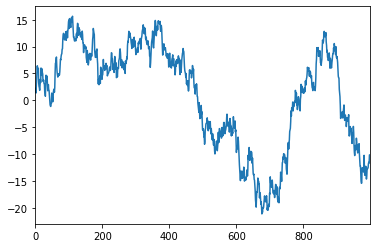

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data  = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

          A         B         C         D
0  0.765409  2.017663  0.663203 -0.703863
1 -0.781893  1.432395 -1.176868 -2.048685
2  0.597268  0.413705 -0.606395  0.690893
3 -1.848500  0.181674 -0.642415  0.091416
4  0.480634  0.349679 -0.999269 -0.360089


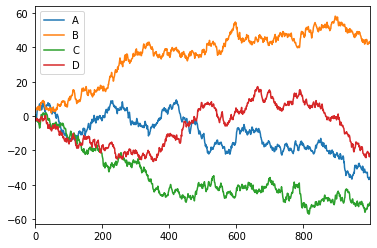

In [124]:
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list('ABCD'))
print(data.head())
data = data.cumsum()
data.plot()
plt.show()